In [ ]:
!nvidia-smi

Tue Mar 11 15:36:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Dataset para entrenamiento

Se usa un dataset de roboflow de libros segmentados





# Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RIKrrlmmc7s7ffRCN2dI")
project = rf.workspace("koteitan").project("book-spine-detection-2cci9")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to book-spine-detection-2 in yolov11:: 100%|██████████| 18600/18600 [00:04<00:00, 4347.00it/s]


# 3 Instalación de requerimientos


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# 5 Entrenamiento de modelo

## Parametros

- Uso de modelo preentrenado Yolo11s
- Se entrena por 40 epocas, debido a que se tiene un dataset con una cantidad considerable de imagenes

## Entrenamiento

In [ ]:
from ultralytics import YOLO

In [ ]:

!yolo task=detect mode=train model=yolo11s.pt data=/content/book-spine-detection-2/data.yaml epochs=40 imgsz=640 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 18.4M/18.4M [00:00<00:00, 231MB/s]
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/book-spine-detection-2/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

# Test Model

Se realiza la inferencia en la data de validacion

In [ ]:
!yolo detect predict model=runs/detect/train3/weights/best.pt source=/content/book-spine-detection-2/valid/images save=True

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/782 /content/book-spine-detection-2/valid/images/0_044_jpg.rf.91b314c095b11a6ea8bebde16a160b11.jpg: 640x640 18 0s, 15.6ms
image 2/782 /content/book-spine-detection-2/valid/images/0_046_jpg.rf.32ff06b0bfb7364ec2663471fb24e0f9.jpg: 640x640 22 0s, 15.6ms
image 3/782 /content/book-spine-detection-2/valid/images/0_054_jpg.rf.bb21b2a297fddc847b249a7bb62d25ee.jpg: 640x640 37 0s, 15.5ms
image 4/782 /content/book-spine-detection-2/valid/images/0_055_jpg.rf.3c9e5ef03dceb6f559f35f360ac90759.jpg: 640x640 23 0s, 15.5ms
image 5/782 /content/book-spine-detection-2/valid/images/0_056_jpg.rf.c586ae5058b5de3be16e177cc7df0d57.jpg: 640x640 23 0s, 15.5ms
image 6/782 /content/book-spine-detection-2/valid/images/0_057_jpg.rf.85f2ac5f18d0bab2c71e08a0c1edeb4c.jpg: 640x640 31 0s, 15.5ms
image 7/782 /content/book-spine-detection-2/valid/ima

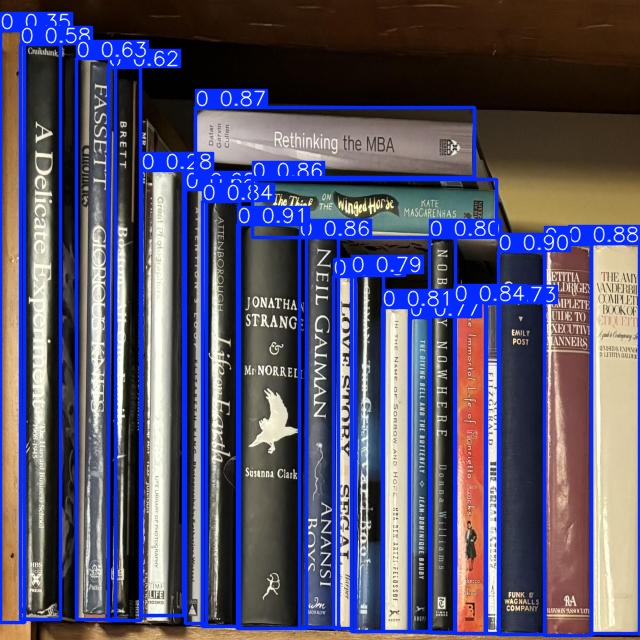

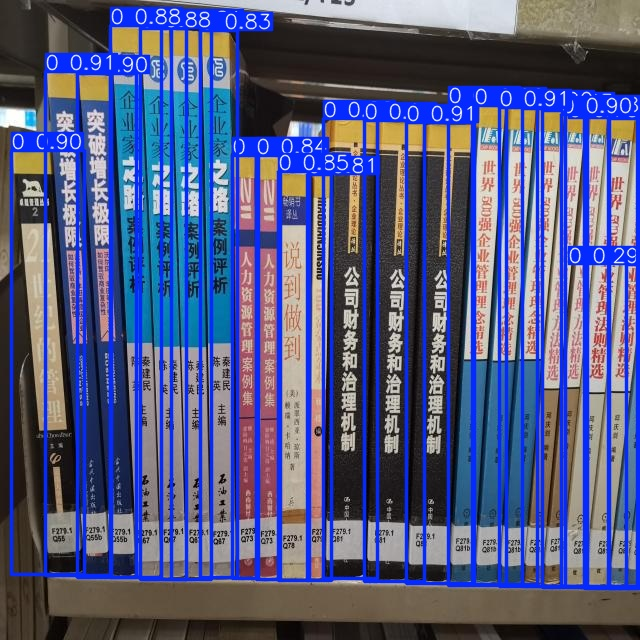

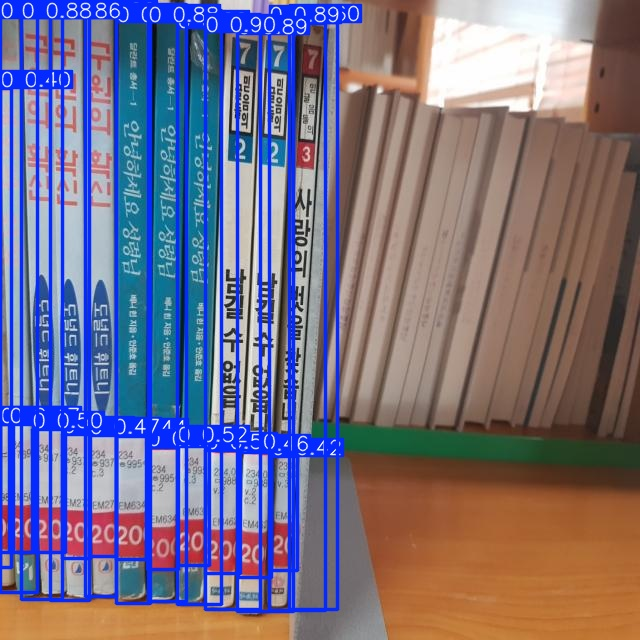

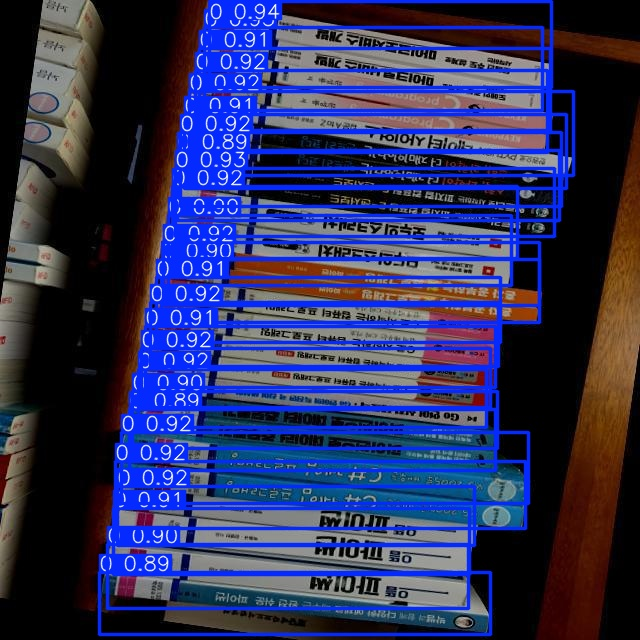

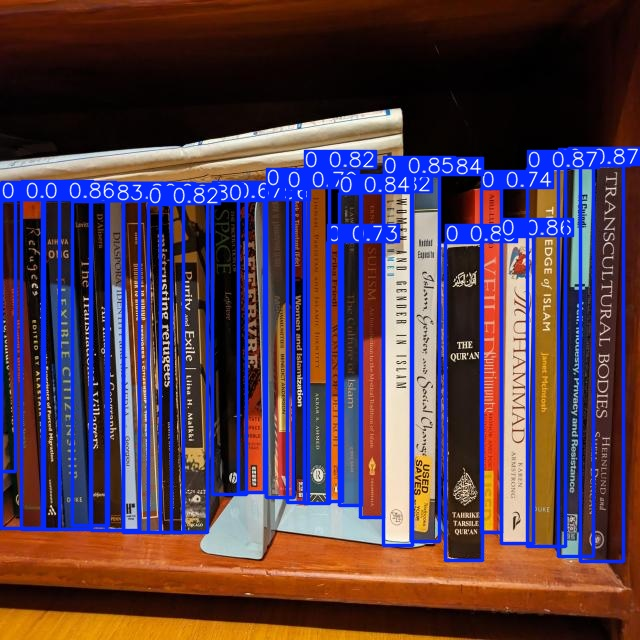

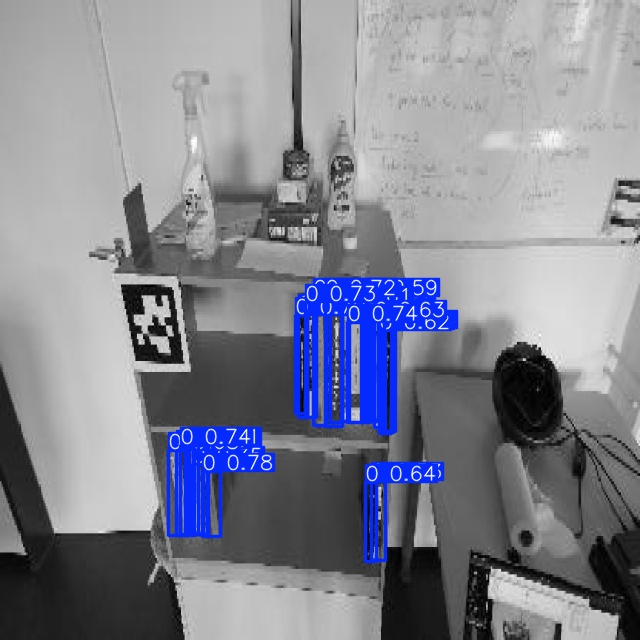

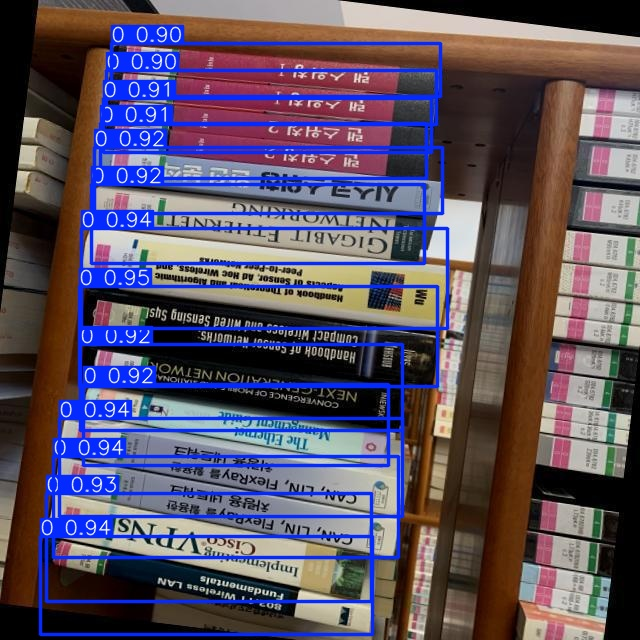

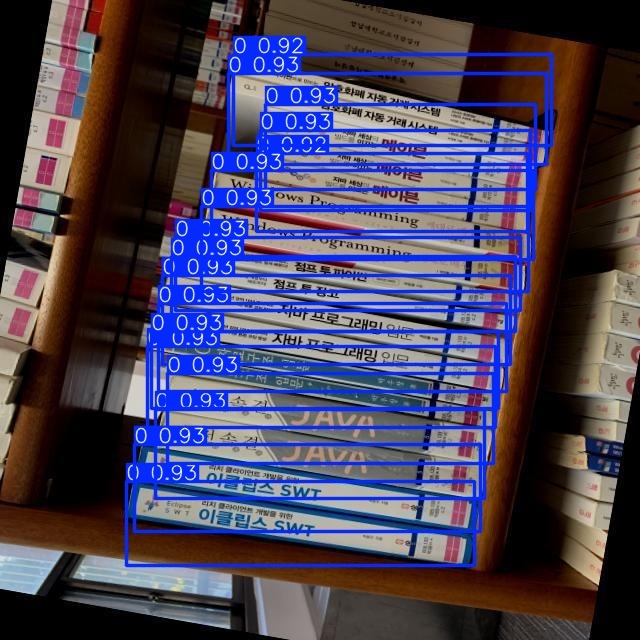

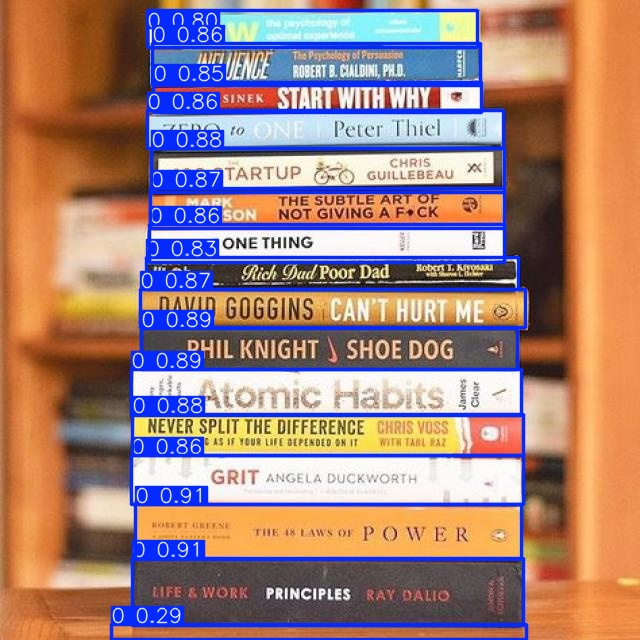

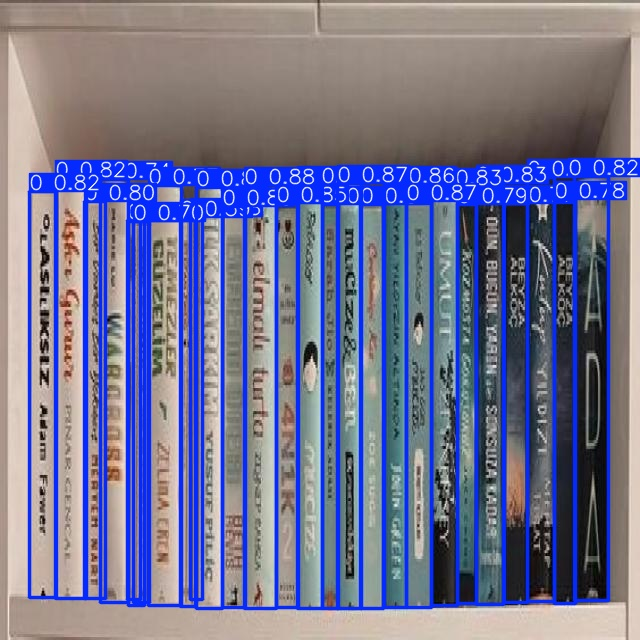

In [ ]:
#Observamos 10 resultados de nuestro modelo
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


## Descargando el modelo



In [ ]:
# Se crea la carpeta
!mkdir /content/my_model4
!cp /content/runs/detect/train3/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train3 /content/my_model

# El modelo se guarda en un zip
%cd my_model
!zip /content/my_model4.zip my_model.pt
!zip -r /content/my_model4.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/labels.jpg (deflated 22%)
  adding: train/events.out.tfevents.1741709111.1e8c9b771588.7958.0 (deflated 94%)
  adding: train/weights/ (stored 0%)
  adding: train/labels_correlogram.jpg (deflated 29%)
  adding: train/train_batch1.jpg (deflated 4%)
  adding: train/train_batch0.jpg (deflated 2%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch2.jpg (deflated 3%)
/content


# Muestra con una imagen especifica

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/test.jpg save=True

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/test.jpg: 480x640 4 0s, 70.0ms
Speed: 4.0ms preprocess, 70.0ms inference, 193.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Se extrae cada imagen de los libros

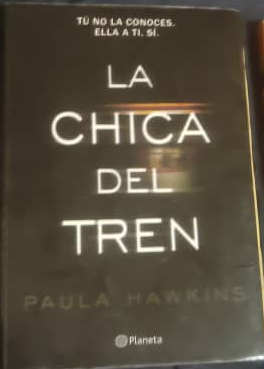

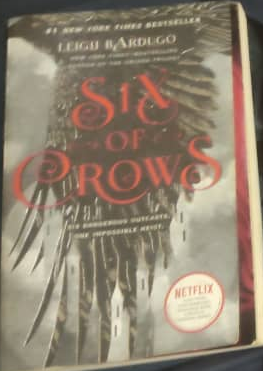

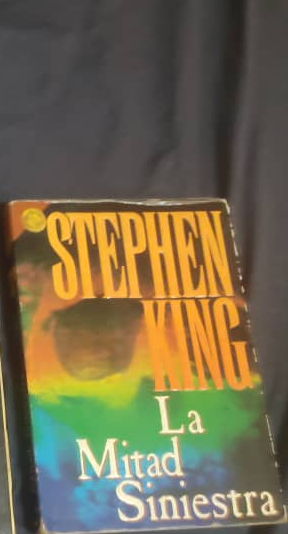

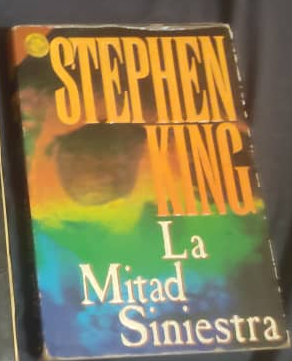

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Ruta del archivo de texto con las coordenadas
label_path = "/content/runs/detect/predict4/labels/test.txt"

# Ruta de la imagen original
image_path = "/content/test.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Leer el archivo de texto con las coordenadas
with open(label_path, "r") as file:
    lines = file.readlines()

# Procesar cada línea (cada bounding box)
for i, line in enumerate(lines):
    # Parsear la línea: <class_id> <x_center> <y_center> <width> <height>
    class_id, x_center, y_center, width, height = map(float, line.strip().split())

    # Convertir coordenadas normalizadas a píxeles
    h, w = image.shape[:2]
    x_center *= w
    y_center *= h
    width *= w
    height *= h

    # Calcular (x_min, y_min, x_max, y_max)
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    # Recortar la región de interés (ROI)
    book_image = image[y_min:y_max, x_min:x_max]

    # Guardar la imagen recortada
    cv2.imwrite(f"libro_{i+1}.jpg", book_image)

    # Mostrar la imagen recortada
    cv2_imshow(book_image)